## Logistics Regression

#### Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is binary in nature. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

![title](https://miro.medium.com/max/1400/1*W6UhEtMnsz4LGE6Sw1kS8A.png)

#### A Binary logistic regression (often referred to simply as logistic regression), predicts the probability that an observation falls into one of two categories of a dichotomous dependent variable based on one or more independent variables that can be either continuous or categorical.

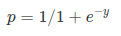

![image.png](https://miro.medium.com/max/329/0*1-TM_M93_cM6xIe1.png)

![title](https://miro.medium.com/max/1400/1*k1hZpBzn9_zJkBnwr7M1dw.png)

### Sigmoid Function

![title](https://miro.medium.com/max/1400/1*Q6heQ6oKkU4Aa_epcPnTcw.png)

## Approach :

### <font color='blue'> A magazine reseller is trying to decide what magazines to market to customers</font>

#### Here are the variables that magazine reseller has on each customer from

#### <font color='maroon'>Household Income -- (Income; rounded to the nearest $1,000.00)<br>Gender -- (IsFemale = 1 if the person is female, 0 otherwise)<br>Marital Status -- (IsMarried = 1 if married, 0 otherwise)<br>College Educated -- (HasCollege = 1 if has one or more years of college education, 0 otherwise)<br>Employed in a Profession -- (IsProfessional = 1 if employed in a profession, 0 otherwise)<br>Retired -- (IsRetired = 1 if retired, 0 otherwise)<br>Not employed -- (Unemployed = 1 if not employed, 0 otherwise)<br>Length of Residency in Current City -- (ResLength; in years)<br>Dual Income if Married -- (Dual = 1 if dual income, 0 otherwise)<br>Children -- (Minors = 1 if children under 18 are in the household, 0 otherwise)<br>Home ownership -- (Own = 1 if own residence, 0 otherwise)<br>Resident type -- (House = 1 if the residence is a single-family house, 0 otherwise)<br>Race -- (White = 1 if the race is white, 0 otherwise)<br>Language -- (English = 1 is the primary language in the household is English, 0 otherwise)<br></font>

### <font color='green'> Aim : we will be building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not.</font>

In [1]:
import time

start = time.process_time()

#  Import all the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and check

# Download dataset from http://logisticregressionanalysis.com/303-what-a-logistic-regression-data-set-looks-like-an-example/

kidDataset = pd.read_csv("E:\\Kaggle & ML Projects\\Data Science - ML Models\\Supervised\\Classification problem\\Algorithms\\Logistic Regrression\\Kids.csv")
kidDataset.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [3]:
#  kidDataset.shape returns the number of rows and columns. For this case, there are 673 rows and 18 columns.

kidDataset.shape

(673, 18)

In [4]:
# Remove first column “Obs No.” as it doesn’t have any relevance.

kidDataset.drop(columns=['Obs No.'])

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
669,0,3000,1,0,0,0,0,0,11,0,1,0,1,0,1,0,0
670,1,75000,1,1,0,1,0,0,52,0,0,1,1,1,1,0,0
671,1,51000,1,1,0,1,0,0,10,1,1,1,1,1,1,0,0


In [5]:
# Check for null values anywhere in our dataset. If you have zero values for all the columns then it meant we don’t have 
# any null value in any of the columns.

kidDataset.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

In [6]:
kidDataset.isnull().values.any()

False

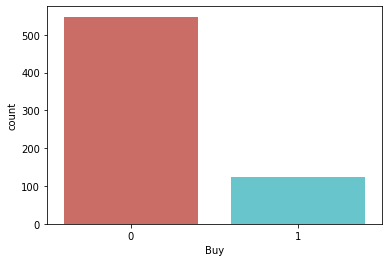

In [7]:
# Explore our target variable

kidDataset.Buy.value_counts()
sns.countplot(x = 'Buy', data = kidDataset, palette = 'hls')
plt.show()

###### Divide the given data into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [8]:
# Independent variable

X = kidDataset[['Income', 'Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 
                'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
                'English', 'Prev Child Mag', 'Prev Parent Mag']]

# Dependent variable

y = kidDataset['Buy']

#### Now split 70% of the data into Training set while 30% of the data to Test set

#### The test_size variable is where we actually specify the proportion of the Test set

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((471, 16), (471,), (202, 16), (202,))

## Train the Model

In [11]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict using Model

In [12]:
# Now that we have trained our algorithm, it’s time to make some predictions. We do the prediction on test data

y_pred = logreg.predict(X_test)

In [13]:
# # Collate all data in DataFrame

# df = pd.DataFrame(X_test) 
# df["Actua Y - Buy"] = y_test
# df["Predicted Y - Buy"] = y_pred

## Have a look of Predited & Actual value of 'Y'

In [14]:
# df

### Let’s talk about the confusion matrix little bit. 

##### A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

#### Few terms to remember in the context of confusion matrix, refer the table below:

### <font color = 'brown'>True positives (TP): These are cases in which we predicted yes and are actually yes.

### <font color = 'brown'>True negatives (TN): We predicted no, and no in actual.

### <font color = 'brown'>Talse positives (FP): We predicted yes, but actual is no. (Type I error)

### <font color = 'brown'>False negatives (FN): We predicted no, yes in actual. (Type II error)

#### <font color = 'brown'>Confusion matrix

![title](https://miro.medium.com/max/700/1*sVQ3FnVafIj3DgNt2xO32w.png)
    
There is also a list of rates that are often computed from a confusion matrix for a binary classifier:

### <font color = 'orange'>Accuracy: Overall, how often is the classifier correct?
#### <font color = 'blue'>Accuracy = (TP+TN)/total</font>

### <font color = 'orange'>Misclassification Rate(Error Rate): Overall, how often is it wrong?
#### <font color = 'blue'>Misclassification Rate = (FP+FN)/total </font>

### <font color = 'orange'>True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes?
#### <font color = 'blue'>True Positive Rate = TP/actual yes </font>

### <font color = 'orange'>False Positive Rate: When it’s actually no, how often does it predict yes?
#### <font color = 'blue'>False Positive Rate=FP/actual no </font>

### <font color = 'orange'>True Negative Rate(Specificity): When it’s actually no, how often does it predict no?
#### <font color = 'blue'>True Negative Rate=TN/actual no </font>

### <font color = 'orange'>Precision: When it predicts yes, how often is it correct?
#### <font color = 'blue'>Precision=TP/predicted yes </font>

### <font color = 'orange'>Prevalence: How often does the yes condition actually occur in our sample?
#### <font color = 'blue'>Prevalence=actual yes/total </font>

## Model Evaluation using Confusion Matrix

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[156,   7],
       [ 10,  29]], dtype=int64)

## Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

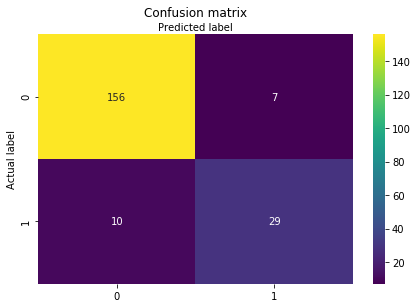

In [16]:
class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

#### Well, our binary classification model predicted the outcome with 91.58% accuracy which is considered as good.

#### Precision is about being precise, i.e., how accurate your model is.  In your prediction case, when your Logistic Regression model predicted customers will buy the magazine 80.55% of the time.

#### Recall or Sensitivity: If there are customers that bought the magazine in test data and your Logistic Regression model can identify it 74.36% of the time.

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9158415841584159
Precision: 0.8055555555555556
Recall: 0.7435897435897436


## ROC Curve

#### ROC(Receiver Operating Characteristic) curve is a plot of the true positive rate(Recall) against the false positive rate. 

#### AUC(Area Under Curve) score for the case is 0.96. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

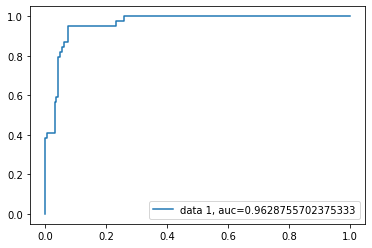

Time consumed to execute complete code : 3.859375 sec


In [18]:
y_pred_proba = logreg.predict_proba(X_test) 
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print(f'Time consumed to execute complete code : {time.process_time() - start}',"sec")

## Thank You!   Next --->


## ---- Multiclass logistic regression ----